In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [2]:
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')
sub = pd.read_csv('./Data/sample_submission.csv')

In [3]:
train.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [4]:
test.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [5]:
sub

,ID,Crop_Damage
0,F00000002,1
1,F00000011,1
2,F00000014,1
3,F00000015,1
4,F00000016,1
...,...,...
59305,F00155901,1
59306,F00155912,1
59307,F00155930,1
59308,F00155933,1


In [6]:
#imputer = imputer.fit(train['Number_Weeks_Used'])
#train['Number_Weeks_Used'] = imputer.transform(train['Number_Weeks_Used'])
#test['Number_Weeks_Used'] = imputer.transform(test['Number_Weeks_Used'])
train.fillna(0, inplace = True)
test.fillna(0, inplace = True)

In [7]:
cat_feat = ['Crop_Type','Soil_Type','Pesticide_Use_Category','Season']
cont_feat = ['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit']
train[cat_feat] = train[cat_feat].apply(lambda x: x.astype('category'))
test['Crop_Damage'] = 0
test[cat_feat] = test[cat_feat].apply(lambda x: x.astype('category'))
test.drop('Crop_Damage',axis = 1, inplace = True)

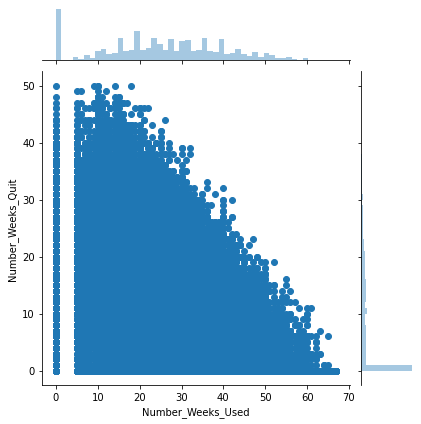

In [8]:
sns.jointplot(x = 'Number_Weeks_Used',y = 'Number_Weeks_Quit',data = train)

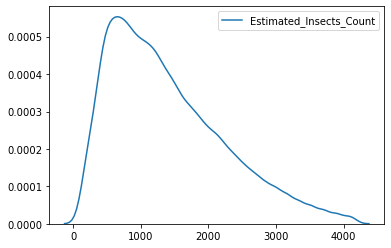

In [9]:
sns.kdeplot(train['Estimated_Insects_Count'])

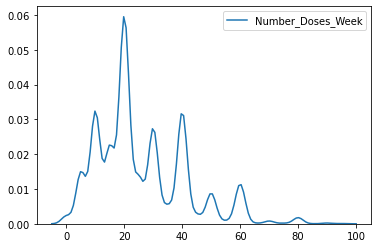

In [10]:
sns.kdeplot(train['Number_Doses_Week'])

(<matplotlib.axes._subplots.AxesSubplot at 0x22729e80b08>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22729e80b08>)

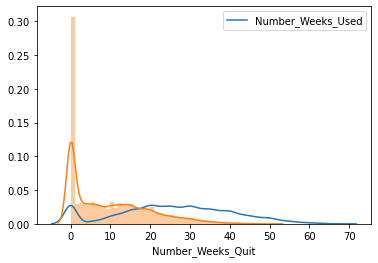

In [11]:
sns.kdeplot(train['Number_Weeks_Used']),sns.distplot(train['Number_Weeks_Quit'])

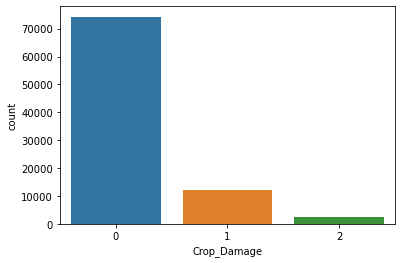

In [46]:
sns.countplot(x = 'Crop_Damage', data = train)

In [12]:
train['Estimated_Insects_Count'] = np.log(train['Estimated_Insects_Count'])
test['Estimated_Insects_Count'] = np.log(test['Estimated_Insects_Count'])
train.drop('ID',axis = 1,inplace = True)
test.drop('ID',axis = 1,inplace = True)
train

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,5.236442,1,0,1,0,0.0,0,1,0
1,5.342334,1,0,1,0,0.0,0,2,1
2,5.549076,1,0,1,0,0.0,0,2,1
3,5.549076,1,1,1,0,0.0,0,2,1
4,5.834811,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
88853,8.112827,1,0,2,10,12.0,44,3,0
88854,8.165079,1,0,2,10,20.0,38,1,0
88855,8.165079,1,0,2,15,40.0,8,2,0
88856,8.216628,1,0,2,10,25.0,18,3,0


In [13]:
train

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,5.236442,1,0,1,0,0.0,0,1,0
1,5.342334,1,0,1,0,0.0,0,2,1
2,5.549076,1,0,1,0,0.0,0,2,1
3,5.549076,1,1,1,0,0.0,0,2,1
4,5.834811,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
88853,8.112827,1,0,2,10,12.0,44,3,0
88854,8.165079,1,0,2,10,20.0,38,1,0
88855,8.165079,1,0,2,15,40.0,8,2,0
88856,8.216628,1,0,2,10,25.0,18,3,0


In [56]:
X = train.drop('Crop_Damage',axis = 1).values
y = train['Crop_Damage'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 41)

In [15]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((71086, 8), (71086,), (17772, 8), (17772,))

In [16]:
rclf = RandomForestClassifier()
rclf.fit(X_train,y_train)
rclf.score(X_test,y_test)

0.8202228224172856

In [17]:
test

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,5.236442,1,1,1,0,0.0,0,2
1,6.016157,1,1,1,0,0.0,0,2
2,6.439350,1,0,1,0,0.0,0,2
3,6.594413,1,0,1,0,0.0,0,2
4,6.670766,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...
59305,8.112827,1,0,2,20,34.0,12,1
59306,8.165079,1,0,2,20,32.0,10,2
59307,8.216628,1,0,2,10,0.0,48,1
59308,8.216628,1,0,2,10,28.0,17,2


In [18]:
rclf.predict(test.values)

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [19]:
sub['Crop_Damage'] = rclf.predict(test.values)

In [20]:
sub.to_csv('Random_Forest_without_tuning.csv',index = False) # 0.7764284515

In [21]:
catclf = CatBoostClassifier(random_state = 41)
catclf.fit(X_train,y_train)

print('Accuracy on train:',catclf.score(X_train,y_train))
print('Accuracy on test:',catclf.score(X_test,y_test))

Learning rate set to 0.098348
0:	learn: 0.9816840	total: 149ms	remaining: 2m 28s
1:	learn: 0.8928318	total: 213ms	remaining: 1m 46s
2:	learn: 0.8225232	total: 287ms	remaining: 1m 35s
3:	learn: 0.7665250	total: 313ms	remaining: 1m 17s
4:	learn: 0.7196801	total: 346ms	remaining: 1m 8s
5:	learn: 0.6807285	total: 371ms	remaining: 1m 1s
6:	learn: 0.6477912	total: 405ms	remaining: 57.5s
7:	learn: 0.6194684	total: 446ms	remaining: 55.3s
8:	learn: 0.5955088	total: 483ms	remaining: 53.2s
9:	learn: 0.5745706	total: 516ms	remaining: 51s
10:	learn: 0.5567878	total: 549ms	remaining: 49.3s
11:	learn: 0.5427224	total: 573ms	remaining: 47.2s
12:	learn: 0.5297895	total: 606ms	remaining: 46s
13:	learn: 0.5179429	total: 643ms	remaining: 45.3s
14:	learn: 0.5071328	total: 677ms	remaining: 44.5s
15:	learn: 0.4984637	total: 706ms	remaining: 43.4s
16:	learn: 0.4905034	total: 738ms	remaining: 42.6s
17:	learn: 0.4834533	total: 773ms	remaining: 42.2s
18:	learn: 0.4774476	total: 811ms	remaining: 41.9s
19:	learn: 

167:	learn: 0.4121118	total: 5.47s	remaining: 27.1s
168:	learn: 0.4120667	total: 5.5s	remaining: 27s
169:	learn: 0.4119985	total: 5.53s	remaining: 27s
170:	learn: 0.4119183	total: 5.56s	remaining: 26.9s
171:	learn: 0.4118534	total: 5.59s	remaining: 26.9s
172:	learn: 0.4117767	total: 5.62s	remaining: 26.9s
173:	learn: 0.4116642	total: 5.65s	remaining: 26.8s
174:	learn: 0.4115540	total: 5.68s	remaining: 26.8s
175:	learn: 0.4115030	total: 5.71s	remaining: 26.7s
176:	learn: 0.4114042	total: 5.74s	remaining: 26.7s
177:	learn: 0.4113279	total: 5.78s	remaining: 26.7s
178:	learn: 0.4112589	total: 5.81s	remaining: 26.6s
179:	learn: 0.4112064	total: 5.84s	remaining: 26.6s
180:	learn: 0.4111306	total: 5.87s	remaining: 26.6s
181:	learn: 0.4110209	total: 5.91s	remaining: 26.6s
182:	learn: 0.4109842	total: 5.94s	remaining: 26.5s
183:	learn: 0.4108392	total: 5.98s	remaining: 26.5s
184:	learn: 0.4107924	total: 6.01s	remaining: 26.5s
185:	learn: 0.4107716	total: 6.05s	remaining: 26.5s
186:	learn: 0.410

328:	learn: 0.4044841	total: 10.6s	remaining: 21.6s
329:	learn: 0.4044260	total: 10.6s	remaining: 21.6s
330:	learn: 0.4043470	total: 10.7s	remaining: 21.5s
331:	learn: 0.4043133	total: 10.7s	remaining: 21.5s
332:	learn: 0.4042823	total: 10.7s	remaining: 21.5s
333:	learn: 0.4042440	total: 10.8s	remaining: 21.5s
334:	learn: 0.4042267	total: 10.8s	remaining: 21.4s
335:	learn: 0.4041885	total: 10.8s	remaining: 21.4s
336:	learn: 0.4041608	total: 10.9s	remaining: 21.4s
337:	learn: 0.4041180	total: 10.9s	remaining: 21.3s
338:	learn: 0.4040547	total: 10.9s	remaining: 21.3s
339:	learn: 0.4040215	total: 10.9s	remaining: 21.2s
340:	learn: 0.4039652	total: 11s	remaining: 21.2s
341:	learn: 0.4039456	total: 11s	remaining: 21.2s
342:	learn: 0.4039261	total: 11s	remaining: 21.1s
343:	learn: 0.4038809	total: 11.1s	remaining: 21.1s
344:	learn: 0.4038201	total: 11.1s	remaining: 21.1s
345:	learn: 0.4037889	total: 11.1s	remaining: 21s
346:	learn: 0.4037695	total: 11.2s	remaining: 21s
347:	learn: 0.4037076	

487:	learn: 0.3988187	total: 15.4s	remaining: 16.2s
488:	learn: 0.3987802	total: 15.5s	remaining: 16.2s
489:	learn: 0.3987325	total: 15.5s	remaining: 16.1s
490:	learn: 0.3987183	total: 15.5s	remaining: 16.1s
491:	learn: 0.3986472	total: 15.5s	remaining: 16s
492:	learn: 0.3986194	total: 15.6s	remaining: 16s
493:	learn: 0.3985409	total: 15.6s	remaining: 16s
494:	learn: 0.3985188	total: 15.6s	remaining: 15.9s
495:	learn: 0.3984787	total: 15.6s	remaining: 15.9s
496:	learn: 0.3984410	total: 15.7s	remaining: 15.9s
497:	learn: 0.3984213	total: 15.7s	remaining: 15.8s
498:	learn: 0.3984102	total: 15.7s	remaining: 15.8s
499:	learn: 0.3983912	total: 15.7s	remaining: 15.7s
500:	learn: 0.3983412	total: 15.8s	remaining: 15.7s
501:	learn: 0.3982922	total: 15.8s	remaining: 15.7s
502:	learn: 0.3982552	total: 15.8s	remaining: 15.6s
503:	learn: 0.3982395	total: 15.9s	remaining: 15.6s
504:	learn: 0.3982248	total: 15.9s	remaining: 15.6s
505:	learn: 0.3981854	total: 15.9s	remaining: 15.5s
506:	learn: 0.3981

648:	learn: 0.3940326	total: 20.2s	remaining: 10.9s
649:	learn: 0.3940210	total: 20.2s	remaining: 10.9s
650:	learn: 0.3940076	total: 20.3s	remaining: 10.9s
651:	learn: 0.3939820	total: 20.3s	remaining: 10.8s
652:	learn: 0.3939726	total: 20.3s	remaining: 10.8s
653:	learn: 0.3939658	total: 20.3s	remaining: 10.8s
654:	learn: 0.3939514	total: 20.4s	remaining: 10.7s
655:	learn: 0.3939357	total: 20.4s	remaining: 10.7s
656:	learn: 0.3938956	total: 20.4s	remaining: 10.7s
657:	learn: 0.3938735	total: 20.4s	remaining: 10.6s
658:	learn: 0.3938374	total: 20.5s	remaining: 10.6s
659:	learn: 0.3938135	total: 20.5s	remaining: 10.6s
660:	learn: 0.3937757	total: 20.5s	remaining: 10.5s
661:	learn: 0.3937544	total: 20.6s	remaining: 10.5s
662:	learn: 0.3937259	total: 20.6s	remaining: 10.5s
663:	learn: 0.3936792	total: 20.6s	remaining: 10.4s
664:	learn: 0.3936631	total: 20.6s	remaining: 10.4s
665:	learn: 0.3936287	total: 20.7s	remaining: 10.4s
666:	learn: 0.3936057	total: 20.7s	remaining: 10.3s
667:	learn: 

811:	learn: 0.3897439	total: 25.4s	remaining: 5.89s
812:	learn: 0.3897270	total: 25.5s	remaining: 5.86s
813:	learn: 0.3897207	total: 25.5s	remaining: 5.83s
814:	learn: 0.3896898	total: 25.5s	remaining: 5.8s
815:	learn: 0.3896451	total: 25.6s	remaining: 5.77s
816:	learn: 0.3896057	total: 25.6s	remaining: 5.74s
817:	learn: 0.3895842	total: 25.6s	remaining: 5.7s
818:	learn: 0.3895736	total: 25.7s	remaining: 5.67s
819:	learn: 0.3895572	total: 25.7s	remaining: 5.64s
820:	learn: 0.3895093	total: 25.7s	remaining: 5.61s
821:	learn: 0.3894824	total: 25.8s	remaining: 5.58s
822:	learn: 0.3894642	total: 25.8s	remaining: 5.54s
823:	learn: 0.3894544	total: 25.8s	remaining: 5.51s
824:	learn: 0.3893911	total: 25.8s	remaining: 5.48s
825:	learn: 0.3893679	total: 25.9s	remaining: 5.45s
826:	learn: 0.3893329	total: 25.9s	remaining: 5.42s
827:	learn: 0.3892950	total: 25.9s	remaining: 5.39s
828:	learn: 0.3892707	total: 26s	remaining: 5.36s
829:	learn: 0.3892388	total: 26s	remaining: 5.33s
830:	learn: 0.3892

973:	learn: 0.3857178	total: 30.5s	remaining: 814ms
974:	learn: 0.3857031	total: 30.5s	remaining: 783ms
975:	learn: 0.3856705	total: 30.6s	remaining: 752ms
976:	learn: 0.3856542	total: 30.6s	remaining: 720ms
977:	learn: 0.3856316	total: 30.6s	remaining: 689ms
978:	learn: 0.3855945	total: 30.7s	remaining: 658ms
979:	learn: 0.3855826	total: 30.7s	remaining: 627ms
980:	learn: 0.3855747	total: 30.7s	remaining: 595ms
981:	learn: 0.3855602	total: 30.8s	remaining: 564ms
982:	learn: 0.3855332	total: 30.8s	remaining: 533ms
983:	learn: 0.3854759	total: 30.8s	remaining: 501ms
984:	learn: 0.3854552	total: 30.9s	remaining: 470ms
985:	learn: 0.3854322	total: 30.9s	remaining: 439ms
986:	learn: 0.3854219	total: 30.9s	remaining: 407ms
987:	learn: 0.3854114	total: 31s	remaining: 376ms
988:	learn: 0.3853722	total: 31s	remaining: 345ms
989:	learn: 0.3853582	total: 31s	remaining: 313ms
990:	learn: 0.3853283	total: 31.1s	remaining: 282ms
991:	learn: 0.3853168	total: 31.1s	remaining: 251ms
992:	learn: 0.3852

In [22]:
sub['Crop_Damage'] = catclf.predict(test.values)
sub.to_csv('catboost_with_default_init.csv',index = False) # 0.7764284515

In [57]:
lgbclf = LGBMClassifier(random_state = 41)
lgbclf.fit(X_train,y_train)

print('Accuracy on train:',lgbclf.score(X_train,y_train))
print('Accuracy on test:',lgbclf.score(X_test,y_test)) 

Accuracy on train: 0.85171482429733
Accuracy on test: 0.8448683322079676


In [58]:
sub['Crop_Damage'] = lgbclf.predict(test.values)
sub.to_csv('LGBM_with_default_init.csv',index = False) # 0.8448683322079676

In [26]:
xgclf = XGBClassifier(random_state = 153)
xgclf.fit(X_train,y_train)

print('Accuracy on train:',xgclf.score(X_train,y_train))
print('Accuracy on test:',xgclf.score(X_test,y_test)) 

Accuracy on train: 0.8590299074360633
Accuracy on test: 0.8418861129867207


In [27]:
sub['Crop_Damage'] = xgclf.predict(test.values)
sub.to_csv('XGBoost_with_default_init.csv',index = False) # 0.0.8418861129867207

In [30]:
trn = train.copy()
tst = test.copy()
trn['Dosage'] = np.log((trn['Number_Doses_Week'] * trn['Number_Weeks_Used'])+1)
tst['Dosage'] = np.log((tst['Number_Doses_Week'] * tst ['Number_Weeks_Used'])+1)

trn.drop(['Number_Doses_Week','Number_Weeks_Used'],axis = 1, inplace = True)
tst.drop(['Number_Doses_Week','Number_Weeks_Used'],axis = 1, inplace = True)
trn

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Weeks_Quit,Season,Crop_Damage,Dosage
0,5.236442,1,0,1,0,1,0,0.000000
1,5.342334,1,0,1,0,2,1,0.000000
2,5.549076,1,0,1,0,2,1,0.000000
3,5.549076,1,1,1,0,2,1,0.000000
4,5.834811,1,0,1,0,2,1,0.000000
...,...,...,...,...,...,...,...,...
88853,8.112827,1,0,2,44,3,0,4.795791
88854,8.165079,1,0,2,38,1,0,5.303305
88855,8.165079,1,0,2,8,2,0,6.398595
88856,8.216628,1,0,2,18,3,0,5.525453


In [35]:
trn = trn[['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Weeks_Quit', 'Season', 'Dosage','Crop_Damage']]
tst = tst[['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Weeks_Quit', 'Season', 'Dosage']]

In [59]:
X = trn.drop('Crop_Damage',axis = 1).values
y = trn['Crop_Damage'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 41)

In [37]:
rclf = RandomForestClassifier()
rclf.fit(X_train,y_train)
rclf.score(X_test,y_test)

0.8062682871933379

In [39]:
sub['Crop_Damage'] = rclf.predict(tst.values)
sub.to_csv('Random_Forest_without_tuning_new_feat.csv',index = False)

In [54]:
lgbclf = LGBMClassifier(random_state = 41)
lgbclf.fit(X_train,y_train)

print('Accuracy on train:',lgbclf.score(X_train,y_train))
print('Accuracy on test:',lgbclf.score(X_test,y_test)) 

Accuracy on train: 0.8450609121345976
Accuracy on test: 0.8386788206167004


In [40]:
catclf = CatBoostClassifier(random_state = 41)
catclf.fit(X_train,y_train)

print('Accuracy on train:',catclf.score(X_train,y_train))
print('Accuracy on test:',catclf.score(X_test,y_test))

Learning rate set to 0.098348
0:	learn: 0.9825394	total: 45.9ms	remaining: 45.9s
1:	learn: 0.8943914	total: 77.3ms	remaining: 38.6s
2:	learn: 0.8243209	total: 108ms	remaining: 35.8s
3:	learn: 0.7674943	total: 133ms	remaining: 33.1s
4:	learn: 0.7202006	total: 165ms	remaining: 32.9s
5:	learn: 0.6814221	total: 210ms	remaining: 34.8s
6:	learn: 0.6490414	total: 246ms	remaining: 34.8s
7:	learn: 0.6209174	total: 279ms	remaining: 34.6s
8:	learn: 0.5971792	total: 314ms	remaining: 34.5s
9:	learn: 0.5773690	total: 347ms	remaining: 34.3s
10:	learn: 0.5592374	total: 388ms	remaining: 34.9s
11:	learn: 0.5435288	total: 427ms	remaining: 35.2s
12:	learn: 0.5301018	total: 457ms	remaining: 34.7s
13:	learn: 0.5183641	total: 488ms	remaining: 34.3s
14:	learn: 0.5089801	total: 515ms	remaining: 33.8s
15:	learn: 0.5002818	total: 549ms	remaining: 33.7s
16:	learn: 0.4926304	total: 582ms	remaining: 33.7s
17:	learn: 0.4856493	total: 612ms	remaining: 33.4s
18:	learn: 0.4796460	total: 646ms	remaining: 33.3s
19:	learn

166:	learn: 0.4243828	total: 5.47s	remaining: 27.3s
167:	learn: 0.4243459	total: 5.5s	remaining: 27.3s
168:	learn: 0.4243240	total: 5.53s	remaining: 27.2s
169:	learn: 0.4242449	total: 5.56s	remaining: 27.1s
170:	learn: 0.4242177	total: 5.59s	remaining: 27.1s
171:	learn: 0.4242024	total: 5.62s	remaining: 27.1s
172:	learn: 0.4241715	total: 5.67s	remaining: 27.1s
173:	learn: 0.4241108	total: 5.72s	remaining: 27.1s
174:	learn: 0.4240735	total: 5.75s	remaining: 27.1s
175:	learn: 0.4240412	total: 5.78s	remaining: 27.1s
176:	learn: 0.4240158	total: 5.81s	remaining: 27s
177:	learn: 0.4239707	total: 5.84s	remaining: 27s
178:	learn: 0.4239310	total: 5.87s	remaining: 26.9s
179:	learn: 0.4238688	total: 5.91s	remaining: 26.9s
180:	learn: 0.4238092	total: 5.95s	remaining: 26.9s
181:	learn: 0.4237659	total: 5.98s	remaining: 26.9s
182:	learn: 0.4237344	total: 6.01s	remaining: 26.8s
183:	learn: 0.4236749	total: 6.03s	remaining: 26.8s
184:	learn: 0.4235363	total: 6.07s	remaining: 26.7s
185:	learn: 0.423

329:	learn: 0.4180114	total: 10.9s	remaining: 22.2s
330:	learn: 0.4179972	total: 11s	remaining: 22.1s
331:	learn: 0.4179556	total: 11s	remaining: 22.1s
332:	learn: 0.4179203	total: 11s	remaining: 22.1s
333:	learn: 0.4178900	total: 11.1s	remaining: 22s
334:	learn: 0.4178630	total: 11.1s	remaining: 22s
335:	learn: 0.4178451	total: 11.1s	remaining: 21.9s
336:	learn: 0.4177839	total: 11.1s	remaining: 21.9s
337:	learn: 0.4177475	total: 11.2s	remaining: 21.9s
338:	learn: 0.4177251	total: 11.2s	remaining: 21.9s
339:	learn: 0.4177020	total: 11.2s	remaining: 21.8s
340:	learn: 0.4176452	total: 11.3s	remaining: 21.8s
341:	learn: 0.4176030	total: 11.3s	remaining: 21.7s
342:	learn: 0.4175571	total: 11.3s	remaining: 21.7s
343:	learn: 0.4175210	total: 11.4s	remaining: 21.7s
344:	learn: 0.4174850	total: 11.4s	remaining: 21.6s
345:	learn: 0.4174519	total: 11.4s	remaining: 21.6s
346:	learn: 0.4174046	total: 11.4s	remaining: 21.5s
347:	learn: 0.4173858	total: 11.5s	remaining: 21.5s
348:	learn: 0.4173565	

489:	learn: 0.4132369	total: 16.2s	remaining: 16.9s
490:	learn: 0.4132059	total: 16.2s	remaining: 16.8s
491:	learn: 0.4131755	total: 16.3s	remaining: 16.8s
492:	learn: 0.4131293	total: 16.3s	remaining: 16.8s
493:	learn: 0.4131045	total: 16.3s	remaining: 16.7s
494:	learn: 0.4130740	total: 16.4s	remaining: 16.7s
495:	learn: 0.4130380	total: 16.4s	remaining: 16.7s
496:	learn: 0.4130193	total: 16.5s	remaining: 16.7s
497:	learn: 0.4129522	total: 16.5s	remaining: 16.6s
498:	learn: 0.4129199	total: 16.5s	remaining: 16.6s
499:	learn: 0.4128829	total: 16.6s	remaining: 16.6s
500:	learn: 0.4128616	total: 16.6s	remaining: 16.5s
501:	learn: 0.4128192	total: 16.6s	remaining: 16.5s
502:	learn: 0.4127943	total: 16.7s	remaining: 16.5s
503:	learn: 0.4127745	total: 16.7s	remaining: 16.5s
504:	learn: 0.4127438	total: 16.8s	remaining: 16.4s
505:	learn: 0.4127123	total: 16.8s	remaining: 16.4s
506:	learn: 0.4126982	total: 16.8s	remaining: 16.4s
507:	learn: 0.4126845	total: 16.9s	remaining: 16.3s
508:	learn: 

651:	learn: 0.4092713	total: 21.7s	remaining: 11.6s
652:	learn: 0.4092492	total: 21.7s	remaining: 11.6s
653:	learn: 0.4092360	total: 21.8s	remaining: 11.5s
654:	learn: 0.4092123	total: 21.8s	remaining: 11.5s
655:	learn: 0.4091908	total: 21.8s	remaining: 11.4s
656:	learn: 0.4091506	total: 21.9s	remaining: 11.4s
657:	learn: 0.4091275	total: 21.9s	remaining: 11.4s
658:	learn: 0.4091054	total: 21.9s	remaining: 11.3s
659:	learn: 0.4090800	total: 22s	remaining: 11.3s
660:	learn: 0.4090570	total: 22s	remaining: 11.3s
661:	learn: 0.4090338	total: 22s	remaining: 11.3s
662:	learn: 0.4090056	total: 22.1s	remaining: 11.2s
663:	learn: 0.4089791	total: 22.1s	remaining: 11.2s
664:	learn: 0.4089573	total: 22.2s	remaining: 11.2s
665:	learn: 0.4089213	total: 22.2s	remaining: 11.1s
666:	learn: 0.4089079	total: 22.2s	remaining: 11.1s
667:	learn: 0.4088777	total: 22.3s	remaining: 11.1s
668:	learn: 0.4088578	total: 22.3s	remaining: 11s
669:	learn: 0.4088458	total: 22.3s	remaining: 11s
670:	learn: 0.4088255	

814:	learn: 0.4057533	total: 27.3s	remaining: 6.19s
815:	learn: 0.4056992	total: 27.3s	remaining: 6.16s
816:	learn: 0.4056678	total: 27.3s	remaining: 6.12s
817:	learn: 0.4056390	total: 27.4s	remaining: 6.09s
818:	learn: 0.4056219	total: 27.4s	remaining: 6.05s
819:	learn: 0.4055928	total: 27.4s	remaining: 6.02s
820:	learn: 0.4055722	total: 27.5s	remaining: 5.99s
821:	learn: 0.4055518	total: 27.5s	remaining: 5.96s
822:	learn: 0.4055321	total: 27.6s	remaining: 5.93s
823:	learn: 0.4055090	total: 27.6s	remaining: 5.89s
824:	learn: 0.4054674	total: 27.6s	remaining: 5.86s
825:	learn: 0.4054617	total: 27.7s	remaining: 5.83s
826:	learn: 0.4054337	total: 27.7s	remaining: 5.79s
827:	learn: 0.4054105	total: 27.7s	remaining: 5.76s
828:	learn: 0.4053973	total: 27.7s	remaining: 5.72s
829:	learn: 0.4053828	total: 27.8s	remaining: 5.69s
830:	learn: 0.4053408	total: 27.8s	remaining: 5.66s
831:	learn: 0.4053104	total: 27.8s	remaining: 5.62s
832:	learn: 0.4052869	total: 27.9s	remaining: 5.59s
833:	learn: 

976:	learn: 0.4024327	total: 32.7s	remaining: 770ms
977:	learn: 0.4024189	total: 32.7s	remaining: 736ms
978:	learn: 0.4024089	total: 32.8s	remaining: 703ms
979:	learn: 0.4023980	total: 32.8s	remaining: 669ms
980:	learn: 0.4023697	total: 32.8s	remaining: 636ms
981:	learn: 0.4023604	total: 32.9s	remaining: 602ms
982:	learn: 0.4023457	total: 32.9s	remaining: 569ms
983:	learn: 0.4023276	total: 32.9s	remaining: 535ms
984:	learn: 0.4023013	total: 32.9s	remaining: 502ms
985:	learn: 0.4022773	total: 33s	remaining: 468ms
986:	learn: 0.4022514	total: 33s	remaining: 435ms
987:	learn: 0.4022395	total: 33s	remaining: 401ms
988:	learn: 0.4022212	total: 33.1s	remaining: 368ms
989:	learn: 0.4021893	total: 33.1s	remaining: 335ms
990:	learn: 0.4021662	total: 33.1s	remaining: 301ms
991:	learn: 0.4021427	total: 33.2s	remaining: 268ms
992:	learn: 0.4021214	total: 33.2s	remaining: 234ms
993:	learn: 0.4021030	total: 33.3s	remaining: 201ms
994:	learn: 0.4020775	total: 33.3s	remaining: 167ms
995:	learn: 0.4020

In [42]:
sub['Crop_Damage'] = catclf.predict(tst.values)
sub.to_csv('catboost_with_default_init_new_feat.csv',index = False) 

In [44]:
train

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,5.236442,1,0,1,0,0.0,0,1,0
1,5.342334,1,0,1,0,0.0,0,2,1
2,5.549076,1,0,1,0,0.0,0,2,1
3,5.549076,1,1,1,0,0.0,0,2,1
4,5.834811,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
88853,8.112827,1,0,2,10,12.0,44,3,0
88854,8.165079,1,0,2,10,20.0,38,1,0
88855,8.165079,1,0,2,15,40.0,8,2,0
88856,8.216628,1,0,2,10,25.0,18,3,0


In [49]:
parameters = [{'learning_rate' : [0.2,0.3],
               'depth' : [5,6],
               }]
grid_search = GridSearchCV(estimator = catclf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs = -1,
                           cv = StratifiedKFold(n_splits = 3, shuffle = True),
                           verbose = 10
)
grid = grid_search.fit(X_train,y_train)
grid.best_params_, grid.best_score_,grid.best_estimator_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:  2.1min remaining:  6.2min
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:  2.1min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:  2.3min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:  3.4min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  3.4min finished


0:	learn: 0.8797014	total: 24ms	remaining: 24s
1:	learn: 0.7506504	total: 41.4ms	remaining: 20.7s
2:	learn: 0.6658986	total: 61.4ms	remaining: 20.4s
3:	learn: 0.6081900	total: 79.4ms	remaining: 19.8s
4:	learn: 0.5661990	total: 96.6ms	remaining: 19.2s
5:	learn: 0.5372054	total: 115ms	remaining: 19s
6:	learn: 0.5133024	total: 133ms	remaining: 18.8s
7:	learn: 0.4955644	total: 152ms	remaining: 18.9s
8:	learn: 0.4825617	total: 172ms	remaining: 18.9s
9:	learn: 0.4718879	total: 197ms	remaining: 19.5s
10:	learn: 0.4639650	total: 220ms	remaining: 19.7s
11:	learn: 0.4584104	total: 251ms	remaining: 20.6s
12:	learn: 0.4535671	total: 269ms	remaining: 20.4s
13:	learn: 0.4496439	total: 291ms	remaining: 20.5s
14:	learn: 0.4469983	total: 315ms	remaining: 20.7s
15:	learn: 0.4444009	total: 334ms	remaining: 20.5s
16:	learn: 0.4423945	total: 360ms	remaining: 20.8s
17:	learn: 0.4409408	total: 379ms	remaining: 20.7s
18:	learn: 0.4399995	total: 400ms	remaining: 20.6s
19:	learn: 0.4389669	total: 426ms	remainin

163:	learn: 0.4226376	total: 3.83s	remaining: 19.5s
164:	learn: 0.4225430	total: 3.85s	remaining: 19.5s
165:	learn: 0.4225115	total: 3.88s	remaining: 19.5s
166:	learn: 0.4224753	total: 3.9s	remaining: 19.5s
167:	learn: 0.4224559	total: 3.93s	remaining: 19.5s
168:	learn: 0.4223825	total: 3.95s	remaining: 19.4s
169:	learn: 0.4223018	total: 3.96s	remaining: 19.4s
170:	learn: 0.4222811	total: 3.98s	remaining: 19.3s
171:	learn: 0.4222456	total: 4.01s	remaining: 19.3s
172:	learn: 0.4221611	total: 4.04s	remaining: 19.3s
173:	learn: 0.4221292	total: 4.07s	remaining: 19.3s
174:	learn: 0.4221025	total: 4.1s	remaining: 19.3s
175:	learn: 0.4220746	total: 4.12s	remaining: 19.3s
176:	learn: 0.4220582	total: 4.14s	remaining: 19.3s
177:	learn: 0.4219358	total: 4.16s	remaining: 19.2s
178:	learn: 0.4218914	total: 4.19s	remaining: 19.2s
179:	learn: 0.4218580	total: 4.21s	remaining: 19.2s
180:	learn: 0.4218255	total: 4.23s	remaining: 19.2s
181:	learn: 0.4217314	total: 4.25s	remaining: 19.1s
182:	learn: 0.

322:	learn: 0.4164261	total: 6.83s	remaining: 14.3s
323:	learn: 0.4163939	total: 6.84s	remaining: 14.3s
324:	learn: 0.4163599	total: 6.86s	remaining: 14.3s
325:	learn: 0.4163170	total: 6.88s	remaining: 14.2s
326:	learn: 0.4162850	total: 6.9s	remaining: 14.2s
327:	learn: 0.4162575	total: 6.91s	remaining: 14.2s
328:	learn: 0.4162138	total: 6.93s	remaining: 14.1s
329:	learn: 0.4161980	total: 6.95s	remaining: 14.1s
330:	learn: 0.4161608	total: 6.97s	remaining: 14.1s
331:	learn: 0.4161213	total: 6.99s	remaining: 14.1s
332:	learn: 0.4161082	total: 7.02s	remaining: 14.1s
333:	learn: 0.4160952	total: 7.04s	remaining: 14s
334:	learn: 0.4160641	total: 7.06s	remaining: 14s
335:	learn: 0.4160262	total: 7.08s	remaining: 14s
336:	learn: 0.4159756	total: 7.09s	remaining: 14s
337:	learn: 0.4159552	total: 7.11s	remaining: 13.9s
338:	learn: 0.4159139	total: 7.13s	remaining: 13.9s
339:	learn: 0.4158692	total: 7.15s	remaining: 13.9s
340:	learn: 0.4158447	total: 7.17s	remaining: 13.8s
341:	learn: 0.4157742

487:	learn: 0.4113820	total: 10.2s	remaining: 10.7s
488:	learn: 0.4113582	total: 10.3s	remaining: 10.7s
489:	learn: 0.4113298	total: 10.3s	remaining: 10.7s
490:	learn: 0.4113045	total: 10.3s	remaining: 10.7s
491:	learn: 0.4112563	total: 10.3s	remaining: 10.7s
492:	learn: 0.4112395	total: 10.4s	remaining: 10.6s
493:	learn: 0.4112188	total: 10.4s	remaining: 10.6s
494:	learn: 0.4111852	total: 10.4s	remaining: 10.6s
495:	learn: 0.4111720	total: 10.4s	remaining: 10.6s
496:	learn: 0.4111244	total: 10.5s	remaining: 10.6s
497:	learn: 0.4110806	total: 10.5s	remaining: 10.6s
498:	learn: 0.4110278	total: 10.5s	remaining: 10.5s
499:	learn: 0.4110023	total: 10.5s	remaining: 10.5s
500:	learn: 0.4109688	total: 10.5s	remaining: 10.5s
501:	learn: 0.4109408	total: 10.5s	remaining: 10.5s
502:	learn: 0.4109115	total: 10.6s	remaining: 10.4s
503:	learn: 0.4108919	total: 10.6s	remaining: 10.4s
504:	learn: 0.4108707	total: 10.6s	remaining: 10.4s
505:	learn: 0.4108543	total: 10.6s	remaining: 10.4s
506:	learn: 

653:	learn: 0.4071538	total: 13.7s	remaining: 7.26s
654:	learn: 0.4071236	total: 13.8s	remaining: 7.24s
655:	learn: 0.4070797	total: 13.8s	remaining: 7.22s
656:	learn: 0.4070666	total: 13.8s	remaining: 7.2s
657:	learn: 0.4070545	total: 13.8s	remaining: 7.17s
658:	learn: 0.4070424	total: 13.8s	remaining: 7.15s
659:	learn: 0.4070272	total: 13.8s	remaining: 7.13s
660:	learn: 0.4070154	total: 13.9s	remaining: 7.11s
661:	learn: 0.4069934	total: 13.9s	remaining: 7.09s
662:	learn: 0.4069795	total: 13.9s	remaining: 7.07s
663:	learn: 0.4069593	total: 13.9s	remaining: 7.05s
664:	learn: 0.4069336	total: 14s	remaining: 7.03s
665:	learn: 0.4068951	total: 14s	remaining: 7.01s
666:	learn: 0.4068790	total: 14s	remaining: 6.99s
667:	learn: 0.4068299	total: 14s	remaining: 6.96s
668:	learn: 0.4068019	total: 14s	remaining: 6.94s
669:	learn: 0.4067936	total: 14.1s	remaining: 6.92s
670:	learn: 0.4067710	total: 14.1s	remaining: 6.9s
671:	learn: 0.4067447	total: 14.1s	remaining: 6.88s
672:	learn: 0.4067362	to

813:	learn: 0.4033571	total: 16.9s	remaining: 3.86s
814:	learn: 0.4033231	total: 16.9s	remaining: 3.84s
815:	learn: 0.4032621	total: 17s	remaining: 3.82s
816:	learn: 0.4032271	total: 17s	remaining: 3.8s
817:	learn: 0.4032054	total: 17s	remaining: 3.78s
818:	learn: 0.4031915	total: 17s	remaining: 3.76s
819:	learn: 0.4031699	total: 17s	remaining: 3.74s
820:	learn: 0.4031563	total: 17.1s	remaining: 3.72s
821:	learn: 0.4031463	total: 17.1s	remaining: 3.7s
822:	learn: 0.4031183	total: 17.1s	remaining: 3.68s
823:	learn: 0.4031043	total: 17.1s	remaining: 3.65s
824:	learn: 0.4030724	total: 17.1s	remaining: 3.63s
825:	learn: 0.4030519	total: 17.2s	remaining: 3.61s
826:	learn: 0.4030254	total: 17.2s	remaining: 3.59s
827:	learn: 0.4029951	total: 17.2s	remaining: 3.57s
828:	learn: 0.4029679	total: 17.2s	remaining: 3.55s
829:	learn: 0.4029529	total: 17.2s	remaining: 3.53s
830:	learn: 0.4029358	total: 17.2s	remaining: 3.51s
831:	learn: 0.4029101	total: 17.3s	remaining: 3.49s
832:	learn: 0.4028992	to

978:	learn: 0.4001586	total: 19.9s	remaining: 426ms
979:	learn: 0.4001280	total: 19.9s	remaining: 406ms
980:	learn: 0.4001166	total: 19.9s	remaining: 386ms
981:	learn: 0.4000988	total: 19.9s	remaining: 365ms
982:	learn: 0.4000853	total: 19.9s	remaining: 345ms
983:	learn: 0.4000678	total: 20s	remaining: 325ms
984:	learn: 0.4000632	total: 20s	remaining: 304ms
985:	learn: 0.4000312	total: 20s	remaining: 284ms
986:	learn: 0.4000095	total: 20s	remaining: 264ms
987:	learn: 0.3999768	total: 20s	remaining: 243ms
988:	learn: 0.3999676	total: 20s	remaining: 223ms
989:	learn: 0.3999572	total: 20.1s	remaining: 203ms
990:	learn: 0.3999325	total: 20.1s	remaining: 182ms
991:	learn: 0.3999183	total: 20.1s	remaining: 162ms
992:	learn: 0.3999008	total: 20.1s	remaining: 142ms
993:	learn: 0.3998747	total: 20.1s	remaining: 122ms
994:	learn: 0.3998621	total: 20.1s	remaining: 101ms
995:	learn: 0.3998420	total: 20.2s	remaining: 81ms
996:	learn: 0.3998050	total: 20.2s	remaining: 60.7ms
997:	learn: 0.3997681	to

({'depth': 5, 'learning_rate': 0.2},
 0.8409391363545758,
 <catboost.core.CatBoostClassifier at 0x2273004d7c8>)

In [52]:
grid.best_estimator_.score(X_test,y_test)

0.8373846500112536

In [53]:
sub['Crop_Damage'] = grid.best_estimator_.predict(tst.values)
sub.to_csv('catboost_with_tuned_init_new_feat.csv',index = False) 

In [ ]:
fimp = pd.DataFrame(zip(trn.drop(['Crop_Damage'],axis = 1).columns,grid.best_estimator_.feature_importances_))
fimp.columns = ['features','Score']

sfimp =fimp.sort_values(by = 'Score')

plt.barh(sfimp['features'],sfimp['Score'])

In [60]:
parameters = [{'learning_rate' : [0.2,0.3],
               'depth' : [5,6],
               }]
grid_search = GridSearchCV(estimator = lgbclf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs = -1,
                           cv = StratifiedKFold(n_splits = 3, shuffle = True),
                           verbose = 10
)
grid = grid_search.fit(X_train,y_train)
grid.best_params_, grid.best_score_,grid.best_estimator_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:    4.0s remaining:   12.2s
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:    4.3s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:    4.5s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:    5.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.0s finished


({'depth': 5, 'learning_rate': 0.2},
 0.8422474144015565,
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                depth=5, importance_type='split', learning_rate=0.2,
                max_depth=-1, min_child_samples=20, min_child_weight=0.001,
                min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
                objective=None, random_state=41, reg_alpha=0.0, reg_lambda=0.0,
                silent=True, subsample=1.0, subsample_for_bin=200000,
                subsample_freq=0))

In [61]:
grid.best_estimator_.score(X_test,y_test)

0.8385100157551204

In [64]:
trn

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Weeks_Quit,Season,Dosage,Crop_Damage
0,5.236442,1,0,1,0,1,0.000000,0
1,5.342334,1,0,1,0,2,0.000000,1
2,5.549076,1,0,1,0,2,0.000000,1
3,5.549076,1,1,1,0,2,0.000000,1
4,5.834811,1,0,1,0,2,0.000000,1
...,...,...,...,...,...,...,...,...
88853,8.112827,1,0,2,44,3,4.795791,0
88854,8.165079,1,0,2,38,1,5.303305,0
88855,8.165079,1,0,2,8,2,6.398595,0
88856,8.216628,1,0,2,18,3,5.525453,0


<BarContainer object of 7 artists>

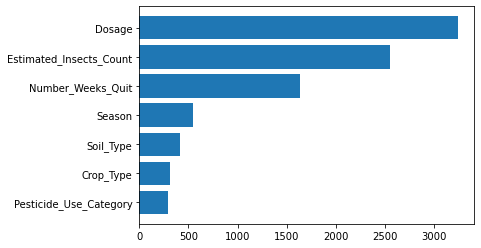

In [65]:
fimp = pd.DataFrame(zip(trn.drop(['Crop_Damage'],axis = 1).columns,grid.best_estimator_.feature_importances_))
fimp.columns = ['features','Score']

sfimp =fimp.sort_values(by = 'Score')

plt.barh(sfimp['features'],sfimp['Score'])

In [62]:
sub['Crop_Damage'] = grid.best_estimator_.predict(tst.values)
sub.to_csv('Lgbm_with_tuned_init_new_feat.csv',index = False) 